
## Experiment 3
The goal of this project is to query the Northwinds database to get the data needed to perform FOUR statistical analyses and hypothesis tests to generate analytical insights that can be of value to the company.


#### Experiment 3 - Does unit price affect quantity of order?

In [8]:
# Perhaps more expensive items reduce the amount a company can/wants to order?

In [249]:
# Import libraries
import pandas as pd
import sqlite3
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from statsmodels.stats.power import  tt_ind_solve_power
import scipy.stats as stats

In [321]:
# Load connection and cursor
conn = sqlite3.connect('Northwind_small.sqlite')
cur = conn.cursor()

# Join some of the tables
cur.execute("""SELECT UnitPrice, Quantity, ProductName
               FROM Product
               JOIN OrderDetail
               Using(UnitPrice)
               ;""")
df3 = pd.DataFrame(cur.fetchall())
df3.columns = [x[0] for x in cur.description]
print(len(df3))
df3.head()

2458


,UnitPrice,Quantity,ProductName
0,18.0,2,Chai
1,18.0,2,Chai
2,18.0,2,Chai
3,18.0,2,Chai
4,18.0,3,Chai


In [322]:
df3.describe()

,UnitPrice,Quantity
count,2458.000000,2458.000000
mean,23.460460,23.815297
std,25.372515,19.473453
min,2.500000,1.000000
25%,12.500000,10.000000
50%,18.000000,20.000000
75%,25.890000,30.000000
max,263.500000,130.000000


In [323]:
df3.UnitPrice.value_counts().head(10)

18.0    408
14.0    224
10.0    213
12.5    110
19.0    106
38.0     90
15.0     78
21.0     76
9.5      58
34.0     37
Name: UnitPrice, dtype: int64

In [133]:
df3.ProductName.describe()

count             2458
unique              77
top       Lakkalikööri
freq               102
Name: ProductName, dtype: object

In [62]:
# Not sure if this grouping is what I want.

In [328]:
# Load connection and cursor
conn = sqlite3.connect('Northwind_small.sqlite')
cur = conn.cursor()

# Join some of the tables
cur.execute("""SELECT UnitPrice, ProductName, SUM(Quantity) as Total_Quantity
               FROM Product
               JOIN OrderDetail
               Using(UnitPrice)
               GROUP BY ProductName
               ORDER BY Total_Quantity DESC
               ;""")
df3 = pd.DataFrame(cur.fetchall())
df3.columns = [x[0] for x in cur.description]
print(len(df3))
df3.head(10)

77


,UnitPrice,ProductName,Total_Quantity
0,18.0,Chai,2382
1,18.0,Chartreuse verte,2382
2,18.0,Lakkalikööri,2382
3,18.0,Steeleye Stout,2382
4,10.0,Aniseed Syrup,1843
5,10.0,Longlife Tofu,1843
6,10.0,Sir Rodney's Scones,1843
7,12.5,Gorgonzola Telino,1430
8,12.5,Scottish Longbreads,1430
9,14.0,Laughing Lumberjack Lager,1277


In [345]:
df3A = df3[:10]

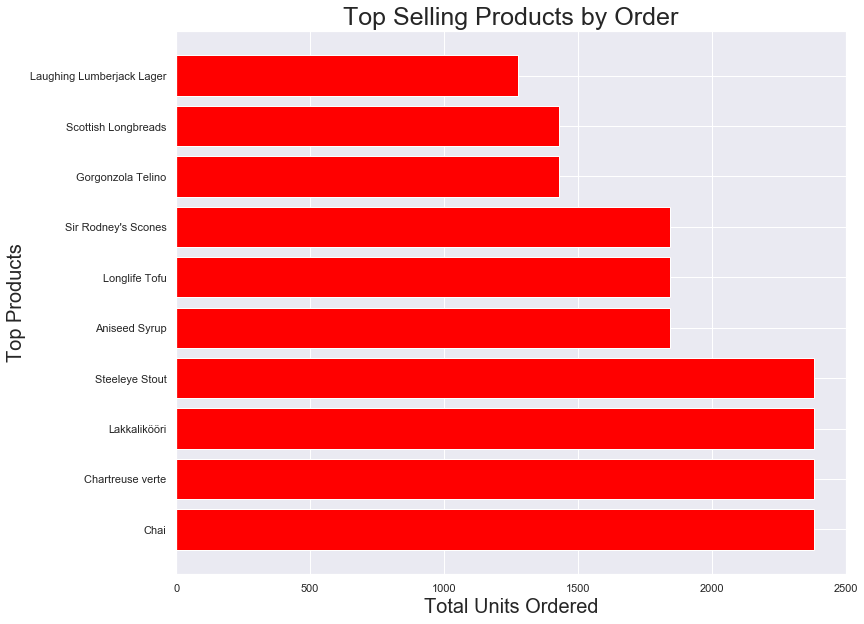

In [349]:
plt.barh(df3A.ProductName, df3A.Total_Quantity, color='red')
pyplot.ylabel("Top Products",fontsize=20)
pyplot.xlabel("Total Units Ordered", fontsize=20)
pyplot.title('Top Selling Products by Order', fontsize=25)
plt.show()

In [319]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

formula = 'Total ~ C(ProductName)'
lm = ols(formula, df3).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

//anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1510: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


ValueError: r_matrix performs f_test for using dimensions that are asymptotically non-normal

In [ ]:
# Try without grouping by product

In [70]:
# Load connection and cursor
conn = sqlite3.connect('Northwind_small.sqlite')
cur = conn.cursor()

# Join some of the tables
cur.execute("""SELECT UnitPrice, Quantity, ProductName
               FROM Product
               JOIN OrderDetail
               Using(UnitPrice)
               ORDER BY UnitPrice DESC
               ;""")
df3 = pd.DataFrame(cur.fetchall())
df3.columns = [x[0] for x in cur.description]
print(len(df3))
df3.head(10)

2458


,UnitPrice,Quantity,ProductName
0,263.5,2,Côte de Blaye
1,263.5,4,Côte de Blaye
2,263.5,5,Côte de Blaye
3,263.5,5,Côte de Blaye
4,263.5,8,Côte de Blaye
5,263.5,10,Côte de Blaye
6,263.5,15,Côte de Blaye
7,263.5,15,Côte de Blaye
8,263.5,15,Côte de Blaye
9,263.5,25,Côte de Blaye


In [71]:
df3.describe()

,UnitPrice,Quantity
count,2458.000000,2458.000000
mean,23.460460,23.815297
std,25.372515,19.473453
min,2.500000,1.000000
25%,12.500000,10.000000
50%,18.000000,20.000000
75%,25.890000,30.000000
max,263.500000,130.000000


In [94]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2458 entries, 0 to 2457
Data columns (total 3 columns):
UnitPrice      2458 non-null float64
Quantity       2458 non-null int64
ProductName    2458 non-null object
dtypes: float64(1), int64(1), object(1)
memory usage: 57.7+ KB


In [74]:
df3.UnitPrice.value_counts()

18.00     408
14.00     224
10.00     213
12.50     110
19.00     106
38.00      90
15.00      78
21.00      76
9.50       58
34.00      37
9.65       36
4.50       36
7.75       35
55.00      35
49.30      34
43.90      34
6.00       32
12.00      31
53.00      30
17.45      30
13.00      29
18.40      28
24.00      26
31.00      26
39.00      25
21.50      25
30.00      25
7.00       24
9.20       24
34.80      23
         ... 
7.45       21
2.50       21
62.50      21
28.50      21
31.23      20
45.60      20
21.05      20
36.00      20
33.25      20
46.00      19
32.80      18
263.50     16
19.45      16
20.00      15
19.50      15
22.00      14
13.25      14
32.00      14
9.00       13
23.25      13
15.50      12
40.00      11
81.00      11
25.00      10
17.00       8
21.35       6
16.25       6
12.75       4
97.00       4
26.00       3
Name: UnitPrice, Length: 62, dtype: int64

In [73]:
df3.Quantity.value_counts()

20     299
30     230
10     217
15     175
40     135
6       98
12      89
25      86
35      84
5       83
50      78
4       75
3       71
60      67
8       62
24      61
21      61
2       60
14      46
18      43
16      31
9       29
28      29
70      22
36      22
42      22
80      20
7       20
45      18
100     15
1       14
65       9
90       9
55       9
32       9
44       8
120      7
49       6
48       5
130      5
56       4
110      4
27       3
77       3
11       3
39       2
84       2
52       2
13       1
22       1
33       1
63       1
66       1
91       1
Name: Quantity, dtype: int64

In [253]:
# Determine the mu for the sales greater than the mean unit price
Expensive = df3[df3['UnitPrice'] > df3.UnitPrice.mean()]
Expensive.describe()

,UnitPrice,Quantity
count,657.000000,657.000000
mean,48.125053,24.184170
std,39.011159,20.518237
min,24.000000,1.000000
25%,32.000000,10.000000
50%,38.000000,20.000000
75%,49.300000,30.000000
max,263.500000,130.000000


In [254]:
# Determine the mu for the sales less than the mean unit price
Cheap = df3[df3['UnitPrice'] < df3.UnitPrice.mean()]
Cheap.describe()

,UnitPrice,Quantity
count,1801.000000,1801.000000
mean,14.462882,23.680733
std,4.588577,19.082211
min,2.500000,1.000000
25%,10.000000,10.000000
50%,14.000000,20.000000
75%,18.000000,30.000000
max,23.250000,130.000000


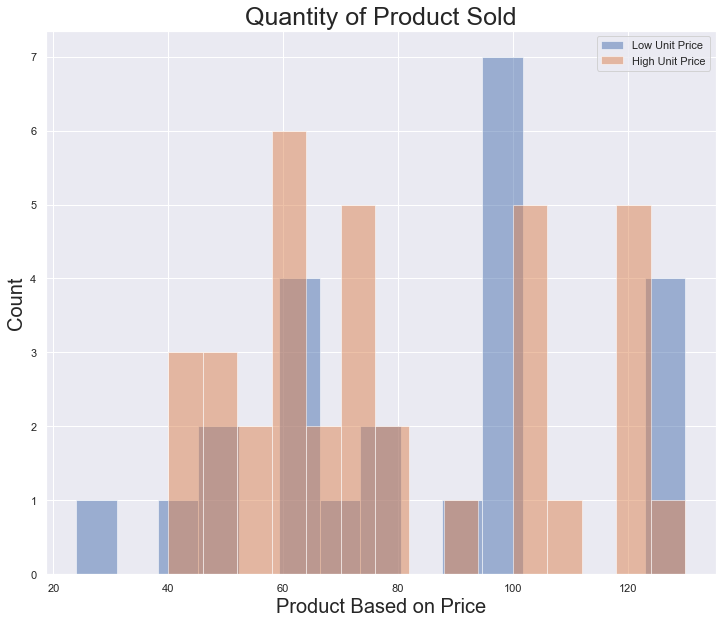

In [325]:
from matplotlib import pyplot
pyplot.hist(Cheap.Quantity, bins=15, alpha=0.5, label='Low Unit Price')
pyplot.hist(Expensive.Quantity, bins=15, alpha=0.5, label='High Unit Price')
pyplot.legend(loc='upper right')
pyplot.ylabel("Count",fontsize=20)
pyplot.xlabel("Product Based on Price", fontsize=20)
pyplot.title('Quantity of Product Sold', fontsize=25)
pyplot.show()

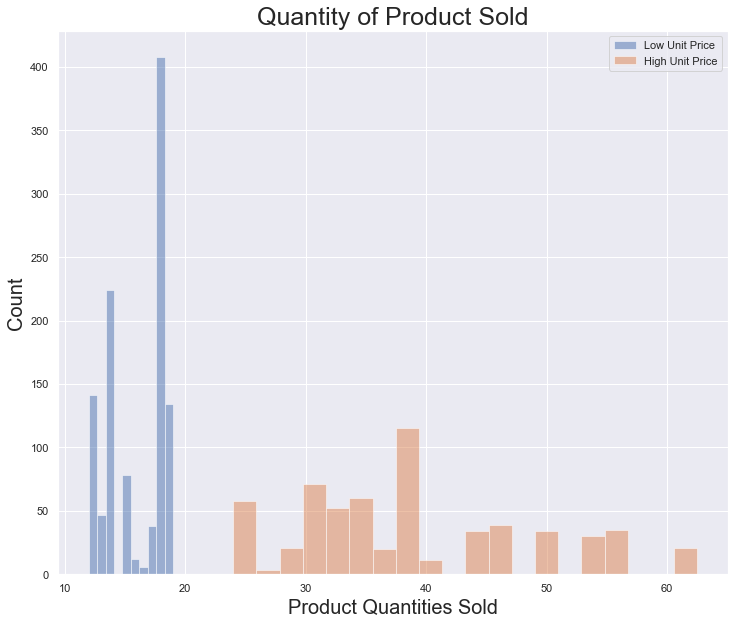

In [278]:
from matplotlib import pyplot
pyplot.hist(Cheap.UnitPrice, bins=10, alpha=0.5, label='Low Unit Price')
pyplot.hist(Expensive.UnitPrice, bins=20, alpha=0.5, label='High Unit Price')
pyplot.legend(loc='upper right')
pyplot.ylabel("Count",fontsize=20)
pyplot.xlabel("Product Quantities Sold", fontsize=20)
pyplot.title('Quantity of Product Sold', fontsize=25)
pyplot.show()

In [274]:
# Check for variance - Homoscedasticity 
stats.levene(Cheap.UnitPrice, Expensive.UnitPrice)

LeveneResult(statistic=763.1474365095552, pvalue=6.147580458737867e-139)

In [275]:
stats.ttest_ind(Cheap.UnitPrice, Expensive.UnitPrice, equal_var = False)

Ttest_indResult(statistic=-57.08958143169095, pvalue=4.282800084311611e-254)

In [276]:
d = Cohen_d(Cheap.UnitPrice, Expensive.UnitPrice)
d

-3.753839523972234

In [277]:
power = tt_ind_solve_power(effect_size=d, alpha=0.1, nobs1=len(Expensive.UnitPrice))
power

1.0

//anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, 'Kernel Density Estimation')

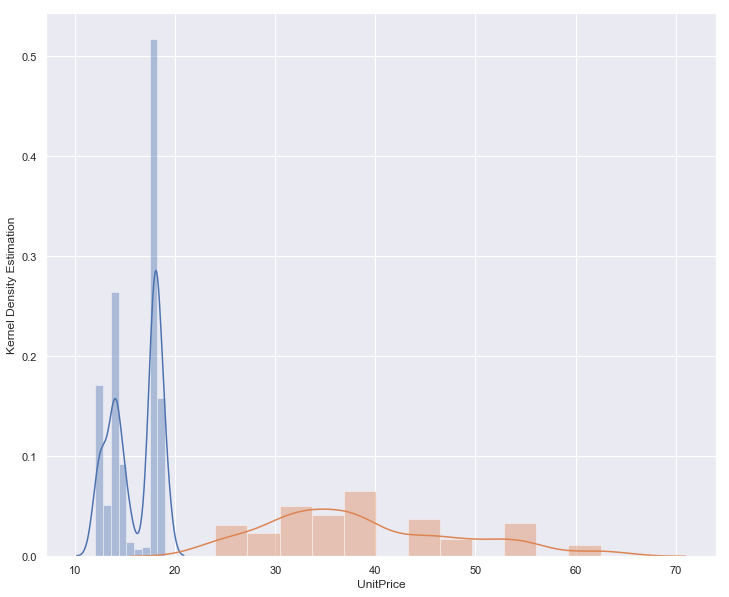

In [273]:
sns.set(color_codes=True);
sns.set(rc={'figure.figsize':(12,10)});
sns.distplot(Cheap.UnitPrice, kde=True, norm_hist=False); # Red distribution
sns.distplot(Expensive.UnitPrice, kde=True, norm_hist=False); # Blue distribution
plt.ylabel("Kernel Density Estimation")

## The Null Hypothesis, $H_0$
The Null Hypothesis for Experiment 3 is that the UnitPrice of an item will have no effect on the quantity of sales. 

## The Alternative Hypothesis, $H_1$
The Alternative Hypothesis for Experiment 3 is that cheaper items will have a greater quantity of sales.

I now have two unequal sized groups with differing variances. I will use an alpha value of 0.05 in order to reject the null.

In [282]:
stats.ttest_ind(Cheap.Quantity, Expensive.Quantity, equal_var = False)

Ttest_indResult(statistic=-0.7539733571921978, pvalue=0.45101567530109654)

In [283]:
# Difference between distribution means
Cheap.Quantity.mean()
Expensive.Quantity.mean()
diff = Expensive.Quantity.mean() - Cheap.Quantity.mean()
diff

0.7737692345150009

In [11]:
# Find the variance
def sample_variance(sample):
    sample_mean = np.mean(sample)
    return np.sum((sample - sample_mean) **2)/ (len(sample) -1)

In [12]:
# Find the pooled variance
def pooled_variance(sample1, sample2):
    n_1, n_2 = len(sample1), len(sample2)
    var_1, var_2 = sample_variance(sample1), sample_variance(sample2)
    return ((n_1-1) * var_1 + (n_2-1)* var_2)/((n_1 + n_2)-2)

In [13]:
# Find the t-stat
def twosample_tstatistic(expr, ctrl):
    exp_mean, ctrl_mean = np.mean(expr), np.mean(ctrl)
    pool_var = pooled_variance(expr, ctrl)
    n_e, n_c = len(expr), len(ctrl)
    num = exp_mean - ctrl_mean
    denom = np.sqrt(pool_var * ((1/n_e)+(1/n_c)))
    return num / denom

In [20]:
# t-stat calculation
t_stat = twosample_tstatistic(Expensive.Quantity, Cheap.Quantity)
t_stat

0.5671413099222338

In [21]:
# Get critical value. For alpha = 0.05 and two tailed test
crit = stats.t.ppf(1-0.025, (len(Cheap.Quantity)+len(Expensive.Quantity)-2))
crit

1.9609303611198365

In [22]:
# Calculate p_value
# Lower tail comulative density function returns area under the lower tail curve
lower_tail = stats.t.cdf(-(t_stat), (len(Cheap.Quantity)+len(Expensive.Quantity)-2), 0, 1)
# Upper tail comulative density function returns area under upper tail curve
upper_tail = 1. - stats.t.cdf(t_stat, (len(Cheap.Quantity)+len(Expensive.Quantity)-2), 0, 1)

p_value = lower_tail+upper_tail
print(p_value)

0.570670009027131


In [258]:
def Cohen_d(group1, group2):

    # Compute Cohen's d.

    # group1: Series or NumPy array
    # group2: Series or NumPy array

    # returns a floating point number 

    diff = group1.mean() - group2.mean()

    n1, n2 = len(group1), len(group2)
    var1 = group1.var()
    var2 = group2.var()

    # Calculate the pooled threshold as shown earlier
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    
    # Calculate Cohen's d statistic
    d = diff / np.sqrt(pooled_var)
    
    return d

In [139]:
d = Cohen_d(Cheap.Quantity, Expensive.Quantity)
d

-0.0258485693448286

What are my results?????????????????
According to my results, the p-value is large enough that I can't safely reject the null - This means that there is not enough evidence to state that the sales will be larger with the discounted group.

In [19]:
# Effect size

In [237]:
def Cohen_d(group1, group2):

    # Compute Cohen's d.

    # group1: Series or NumPy array
    # group2: Series or NumPy array

    # returns a floating point number 

    diff = group1.mean() - group2.mean()

    n1, n2 = len(group1), len(group2)
    var1 = group1.var()
    var2 = group2.var()

    # Calculate the pooled threshold as shown earlier
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    
    # Calculate Cohen's d statistic
    d = diff / np.sqrt(pooled_var)
    
    return d

In [238]:
d = Cohen_d(Cheap.Quantity, Expensive.Quantity)
d

-0.010607550883253235

In [240]:
power = tt_ind_solve_power(effect_size=d, alpha=0.1, nobs1=800)
power

0.10762022151870865

# Questions
* Can I split the data into two groups based on the mean?
* Which test should I use?
* Is it ok that my groups are different sizes?

In [39]:
# Determine Sample Size
mu = Cheap.Quantity.mean()
print(mu)
std = Cheap.Quantity.std()
print(std)
power = 0.8
alpha = 0.05
diff = 3
effect_size = diff/std

sample_size = tt_ind_solve_power(effect_size=effect_size, alpha=alpha, power=power)
sample_size

23.68073292615214
19.08221134158049


636.075528908783

In [80]:
import numpy as np
import scipy.stats as stats

def welch_t(a, b):
    
    """ Calculate Welch's t statistic for two samples. """

    numerator = a.mean() - b.mean()
    
    # “ddof = Delta Degrees of Freedom”: the divisor used in the calculation is N - ddof, 
    #  where N represents the number of elements. By default ddof is zero.
    
    denominator = np.sqrt(a.var(ddof=1)/a.size + b.var(ddof=1)/b.size)
    
    return np.abs(numerator/denominator)

def welch_df(a, b):
    
    """ Calculate the effective degrees of freedom for two samples. This function returns the degrees of freedom """
    
    s1 = a.var(ddof=1) 
    s2 = b.var(ddof=1)
    n1 = a.size
    n2 = b.size
    
    numerator = (s1/n1 + s2/n2)**2
    denominator = (s1/ n1)**2/(n1 - 1) + (s2/ n2)**2/(n2 - 1)
    
    return numerator/denominator


def p_value_welch_ttest(a, b, two_sided=False):
    """Calculates the p-value for Welch's t-test given two samples.
    By default, the returned p-value is for a one-sided t-test. 
    Set the two-sided parameter to True if you wish to perform a two-sided t-test instead.
    """
    t = welch_t(a, b)
    df = welch_df(a, b)
    
    p = 1-stats.t.cdf(np.abs(t), df)
    
    if two_sided:
        return 2*p
    else:
        return p

In [285]:
p_value_welch_ttest(Cheap.Quantity, Expensive.Quantity, two_sided=False)

0.22550783765054827

In [286]:
power = tt_ind_solve_power(effect_size=diff, alpha=diff, nobs1=(len(Expensive.Quantity)))
power

1.0

In [101]:
df3.UnitPrice.value_counts().head(8)

18.0    408
14.0    224
10.0    213
12.5    110
19.0    106
38.0     90
15.0     78
21.0     76
Name: UnitPrice, dtype: int64

In [103]:
df3.UnitPrice.min()

2.5

In [198]:
# Create bins for 'unitprice' based on the values observed in value_counts. 6 values will result in 5 bins
bins = [0, 10, 13, 17, 19, 300]
bins_UnitPrice = pd.cut(df3['UnitPrice'], bins)
bins_UnitPrice = bins_UnitPrice.cat.as_ordered()

UnitPrice_dummy = pd.get_dummies(bins_UnitPrice, prefix="Prices")
df3 = df3.drop(["UnitPrice"], axis=1)
df3 = pd.concat([df3, UnitPrice_dummy], axis=1)

In [199]:
df3.tail()

,Quantity,ProductName,"Prices_(0, 10]","Prices_(10, 13]","Prices_(13, 17]","Prices_(17, 19]","Prices_(19, 300]"
2453,40,Original Frankfurter grüne Soße,0,1,0,0,0
2454,40,Original Frankfurter grüne Soße,0,1,0,0,0
2455,40,Original Frankfurter grüne Soße,0,1,0,0,0
2456,60,Original Frankfurter grüne Soße,0,1,0,0,0
2457,70,Original Frankfurter grüne Soße,0,1,0,0,0


In [200]:
df3.rename(columns={'Prices_(0, 10]':'Price_A',
                    'Prices_(10, 13]':'Price_B',
                    'Prices_(13, 17]':'Price_C',
                    'Prices_(17, 19]':'Price_D',
                    'Prices_(19, 300]':'Price_E'}, 
                    inplace=True)

In [201]:
df3 = df3.drop(["ProductName"], axis=1)

In [202]:
df3.head()

,Quantity,Price_A,Price_B,Price_C,Price_D,Price_E
0,2,0,0,0,1,0
1,2,0,0,0,1,0
2,2,0,0,0,1,0
3,2,0,0,0,1,0
4,3,0,0,0,1,0


In [203]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2458 entries, 0 to 2457
Data columns (total 6 columns):
Quantity    2458 non-null int64
Price_A     2458 non-null uint8
Price_B     2458 non-null uint8
Price_C     2458 non-null uint8
Price_D     2458 non-null uint8
Price_E     2458 non-null uint8
dtypes: int64(1), uint8(5)
memory usage: 31.3 KB


In [204]:
df3.columns[1:]

Index(['Price_A', 'Price_B', 'Price_C', 'Price_D', 'Price_E'], dtype='object')

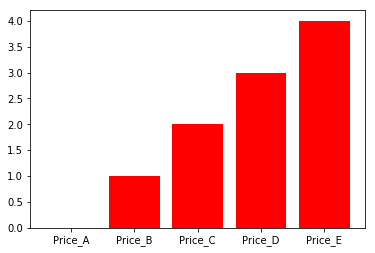

In [169]:
data = df3.columns[1:]
plt.bar(data, range(len(data)),  color='red')
plt.show()

In [174]:
df3.Price_E.describe()

count    2458.000000
mean        0.348657
std         0.476642
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Price_E, dtype: float64

In [206]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

formula = 'Quantity ~ C(Prices_A)'
lm = ols(formula, df3).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

PatsyError: Error evaluating factor: NameError: name 'Prices_A' is not defined
    Quantity ~ C(Prices_A)
               ^^^^^^^^^^^

In [127]:
bins = [0, 10, 13, 17, 19, 300]
df3bin = df3.groupby(pd.cut(df3['UnitPrice'], bins=bins))
df3bin.head()

,UnitPrice,Quantity,ProductName
0,18.0,2,Chai
1,18.0,2,Chai
2,18.0,2,Chai
3,18.0,2,Chai
4,18.0,3,Chai
155,10.0,3,Aniseed Syrup
156,10.0,3,Aniseed Syrup
157,10.0,3,Aniseed Syrup
158,10.0,3,Aniseed Syrup
159,10.0,4,Aniseed Syrup


In [128]:
df3bin

In [305]:
# Determine the mu for the sales greater than the mean unit price
Expensive = df3[df3['UnitPrice'] > 19]
Expensive.describe()

,UnitPrice,Quantity
count,40.000000,40.000000
mean,43.851500,76.175000
std,41.611192,26.516456
min,19.450000,40.000000
25%,23.812500,58.000000
50%,33.025000,70.000000
75%,44.325000,100.000000
max,263.500000,130.000000


In [306]:
Expensive = Expensive[Expensive.UnitPrice < 65]

In [307]:
Expensive.UnitPrice.value_counts()

43.90    2
38.00    2
21.00    2
36.00    1
32.00    1
53.00    1
46.00    1
31.23    1
31.00    1
45.60    1
20.00    1
25.00    1
21.50    1
22.00    1
62.50    1
34.00    1
26.00    1
40.00    1
24.00    1
55.00    1
19.50    1
28.50    1
34.80    1
21.35    1
23.25    1
32.80    1
30.00    1
33.25    1
49.30    1
25.89    1
19.45    1
21.05    1
39.00    1
Name: UnitPrice, dtype: int64

In [308]:
Expensive.UnitPrice.describe()

count    36.000000
mean     33.021389
std      11.295095
min      19.450000
25%      22.937500
50%      31.615000
75%      39.250000
max      62.500000
Name: UnitPrice, dtype: float64

In [309]:
# Determine the mu for the sales less than the mean unit price
Cheap = df3[df3['UnitPrice'] <= 19]
Cheap.describe()

,UnitPrice,Quantity
count,37.000000,37.000000
mean,12.666216,84.027027
std,4.353496,28.637084
min,2.500000,24.000000
25%,9.500000,65.000000
50%,13.000000,80.000000
75%,16.250000,100.000000
max,19.000000,130.000000


In [310]:
Cheap = Cheap[Cheap.UnitPrice > 10]

In [272]:
Cheap.UnitPrice.value_counts()

18.00    408
14.00    224
12.50    110
19.00    106
15.00     78
12.00     31
17.45     30
13.00     29
18.40     28
13.25     14
15.50     12
17.00      8
16.25      6
12.75      4
Name: UnitPrice, dtype: int64

In [234]:
Cheap.UnitPrice.describe()

count    1088.000000
mean       16.068658
std         2.357869
min        12.000000
25%        14.000000
50%        17.450000
75%        18.000000
max        19.000000
Name: UnitPrice, dtype: float64

In [287]:
# Check for variance - Homoscedasticity 
stats.levene(Cheap.Quantity, Expensive.Quantity)

LeveneResult(statistic=0.22853233902206604, pvalue=0.6326760473728115)

In [288]:
stats.ttest_ind(Cheap.Quantity, Expensive.Quantity, equal_var = False)

Ttest_indResult(statistic=-0.7539733571921978, pvalue=0.45101567530109654)

In [289]:
d = Cohen_d(Cheap.UnitPrice, Expensive.UnitPrice)
d

-3.753839523972234

In [291]:
power = tt_ind_solve_power(effect_size=d, alpha=0.05, nobs1=len(Expensive))
power

1.0

//anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, 'Kernel Density Estimation')

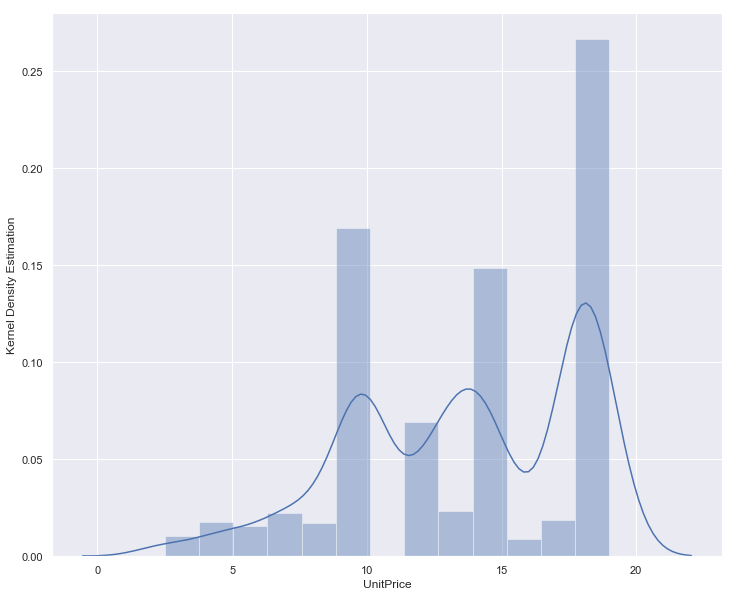

In [190]:
sns.set(color_codes=True);
sns.set(rc={'figure.figsize':(12,10)});
sns.distplot(Cheap.UnitPrice, kde=True, norm_hist=False); # Red distribution
#sns.distplot(Expensive.UnitPrice, kde=True, norm_hist=False); # Blue distribution
plt.ylabel("Kernel Density Estimation")

//anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, 'Kernel Density Estimation')

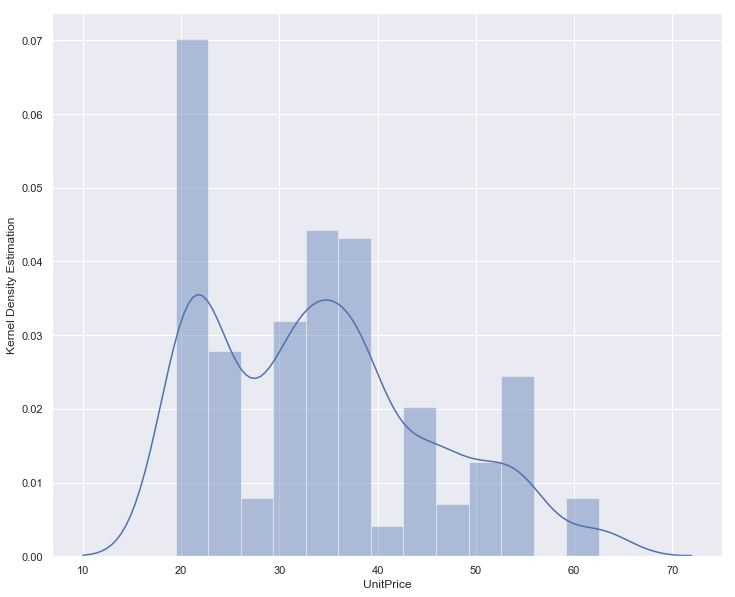

In [221]:
sns.set(color_codes=True);
sns.set(rc={'figure.figsize':(12,10)});
#sns.distplot(Cheap.UnitPrice, kde=True, norm_hist=False); # Red distribution
sns.distplot(Expensive.UnitPrice, kde=True, norm_hist=False); # Blue distribution
plt.ylabel("Kernel Density Estimation")

In [296]:
# Load connection and cursor
conn = sqlite3.connect('Northwind_small.sqlite')
cur = conn.cursor()

# Join some of the tables
cur.execute("""SELECT ProductName, UnitPrice, Quantity
               FROM Product
               JOIN OrderDetail
               Using(UnitPrice)
               GROUP BY ProductName
               ;""")
df3 = pd.DataFrame(cur.fetchall())
df3.columns = [x[0] for x in cur.description]
print(len(df3))
df3.head(10)

77


,ProductName,UnitPrice,Quantity
0,Alice Mutton,39.00,100
1,Aniseed Syrup,10.00,70
2,Boston Crab Meat,18.40,91
3,Camembert Pierrot,34.00,100
4,Carnarvon Tigers,62.50,50
5,Chai,18.00,130
6,Chang,19.00,100
7,Chartreuse verte,18.00,130
8,Chef Anton's Cajun Seasoning,22.00,50
9,Chef Anton's Gumbo Mix,21.35,70


In [301]:
Cheap = df3[df3['UnitPrice'] < df3.UnitPrice.mean()]
Expensive = df3[df3['UnitPrice'] > df3.UnitPrice.mean()]
print(Expensive.describe())
print(Cheap.describe())

        UnitPrice  Quantity
count   25.000000   25.0000
mean    56.582800   84.3200
std     48.571321   27.1166
min     30.000000   40.0000
25%     34.000000   60.0000
50%     40.000000   80.0000
75%     53.000000  100.0000
max    263.500000  130.0000
       UnitPrice    Quantity
count  52.000000   52.000000
mean   15.541154   77.846154
std     6.014250   27.926644
min     2.500000   24.000000
25%    10.000000   60.000000
50%    15.250000   70.000000
75%    19.625000  100.000000
max    28.500000  130.000000


In [ ]:
Cheap = Cheap[Cheap.UnitPrice > 10]

In [298]:
stats.levene(Cheap.Quantity, Expensive.Quantity)

LeveneResult(statistic=0.10674209202009761, pvalue=0.7447941774294091)

In [311]:
stats.ttest_ind(Cheap.Quantity, Expensive.Quantity, equal_var = False)

Ttest_indResult(statistic=0.9046590833979826, pvalue=0.37067639030737154)

In [312]:
d = Cohen_d(Cheap.UnitPrice, Expensive.UnitPrice)
d

-1.9581333937086958

In [313]:
power = tt_ind_solve_power(effect_size=d, alpha=0.05, nobs1=len(Expensive))
power

1.0